In [ ]:
!pip install pandas


In [ ]:
!pip install matplotlib


In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
data = {
    'pH': [7.1,6.8,5.5,8.0,6.2,7.5,6.9,8.5,7.2,5.8,7.0,6.5,7.4,8.2,5.9,7.3,6.7,5.6,8.1,6.0,
           7.6,6.4,8.3,5.7,7.1,6.3,7.8,5.5,6.6,8.4,7.0,6.1,7.7,5.8,7.5,6.9,5.6,8.0,6.5,7.2,
           8.1,5.9,7.4,6.2,8.5,6.8,7.1,5.7,8.3,6.6],
    'Temperature': [22.5,24.1,26.0,20.0,28.3,19.8,21.0,23.4,22.1,25.7,21.8,27.5,20.5,22.9,26.8,21.3,
                    23.1,29.0,20.2,27.1,19.7,25.0,21.6,28.5,22.2,26.3,20.8,30.0,24.8,22.5,21.5,27.0,
                    20.3,28.0,22.7,23.5,29.5,20.6,25.5,21.9,23.2,26.5,20.9,28.2,22.8,24.5,22.0,29.8,
                    21.4,26.0],
    'Turbidity': [1.2,1.5,4.8,0.5,2.9,1.0,1.3,5.2,0.9,6.5,1.1,2.0,0.7,1.4,3.5,0.8,1.7,5.0,0.6,4.0,
                  1.0,2.5,0.7,5.3,1.2,3.0,0.9,6.7,2.2,0.6,1.0,3.8,0.5,5.1,1.3,1.8,5.8,0.7,2.6,1.1,0.8,
                  4.5,0.9,3.1,0.5,2.0,1.0,5.5,0.6,2.8],
    'Dissolved_Oxygen': [8.3,7.9,6.0,9.0,5.5,8.6,7.5,6.8,8.0,5.0,8.1,6.5,8.8,7.7,6.2,8.4,7.2,5.8,
                         9.1,5.7,8.7,6.9,8.5,5.9,8.2,6.4,8.9,5.1,7.0,9.2,8.0,6.1,9.0,5.5,8.3,7.4,5.2,
                         8.9,6.7,8.1,8.6,5.6,8.7,6.3,9.3,7.3,8.2,5.0,9.0,6.8],
    'Conductivity': [250,270,450,220,500,230,240,380,260,520,245,400,210,275,430,225,290,480,200,470,
                     235,360,215,490,255,410,205,530,340,190,240,450,225,495,265,300,520,210,370,250,
                     230,460,220,420,180,320,260,540,195,350],
    'Drinkable': ['Yes','Yes','No','Yes','No','Yes','Yes','No','Yes','No','Yes','No','Yes','Yes','No',
                  'Yes','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','Yes','No','No','Yes',
                  'Yes','No','Yes','No','Yes','Yes','No','Yes','No','Yes','Yes','No','Yes','No','Yes',
                  'No','Yes','No','Yes','No']
}


In [ ]:
df = pd.DataFrame(data)

In [ ]:

df['Drinkable'] = LabelEncoder().fit_transform(df['Drinkable'])

X = df.drop('Drinkable', axis=1)
y = df['Drinkable']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(" Accuracy:", accuracy_score(y_test, y_pred))

 Accuracy: 0.9


In [ ]:
print("\n--- Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))


--- Logistic Regression ---
Accuracy: 1.0


In [ ]:
print("\n--- Decision Tree Classifier ---")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))


--- Decision Tree Classifier ---
Accuracy: 0.9


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


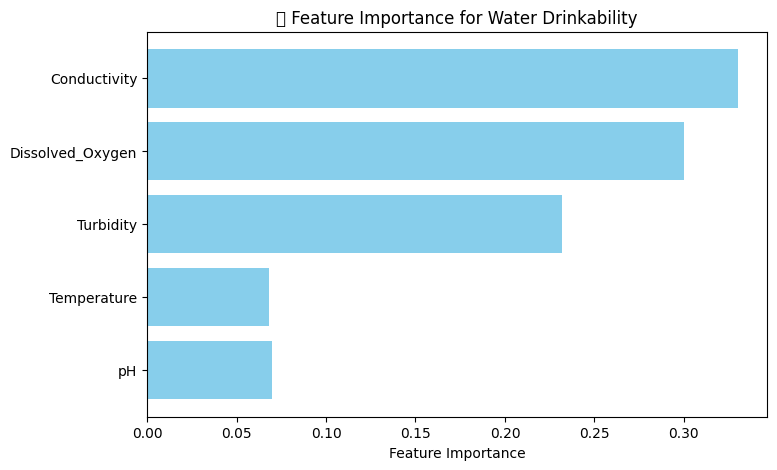

In [ ]:
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('🔍 Feature Importance for Water Drinkability')
plt.show()